In [188]:
from sympy import \
    symbols, S, \
    sin, Mul, factorial, Abs, \
    diff, solve
import numpy as np
import matplotlib.pyplot as plt

In [189]:
x = symbols('x')
n = S(3)
points_count = n + 1
a, b = S(1), S(6)
f = sin(x)

delta = (b - a) / n
x_arr = [(a + delta * i) for i in range(n + 1)]
y_arr = [sin(x_i) for x_i in x_arr]

In [190]:
x_arr

[1, 8/3, 13/3, 6]

In [191]:
y_arr

[sin(1), sin(8/3), sin(13/3), sin(6)]

In [192]:
def make_l(i):
    fractions = [(x - x_arr[j]) / (x_arr[i] - x_arr[j])
                 for j in range(points_count)
                 if i != j]
    return Mul(*fractions)

sum_elements = [y_arr[i] * make_l(i) for i in range(points_count)]
interpolation_result = sum(sum_elements)

interpolation_result

(6/5 - x/5)*(13/10 - 3*x/10)*(8/5 - 3*x/5)*sin(1) + (9/5 - 3*x/10)*(13/5 - 3*x/5)*(3*x/5 - 3/5)*sin(8/3) + (18/5 - 3*x/5)*(3*x/10 - 3/10)*(3*x/5 - 8/5)*sin(13/3) + (x/5 - 1/5)*(3*x/10 - 4/5)*(3*x/5 - 13/5)*sin(6)

In [193]:
interpolation_result.n(4).expand()

0.1094*x**3 - 1.055*x**2 + 2.46*x - 0.6728

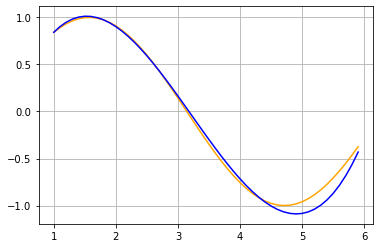

In [208]:
x_grid = np.arange(a, b, 0.1)
interpolation_result_grid = np.array([interpolation_result.subs(x, x_arg).n(4) for x_arg in x_grid])
f_grid = np.array([f.subs(x, x_arg) for x_arg in x_grid])

plt.plot(x_grid, f_grid, color='orange')
plt.plot(x_grid, interpolation_result_grid, color='blue')
plt.grid();

In [195]:
df_np1 = diff(f, x, n + 1)
df_np2 = diff(df_np1, x)

res = solve(df_np2, x)
res = [x for x in res if a <= x <= b]
res.append(a)
res.append(b)

M_np1 = max([Abs(df_np1.subs(x, r)) for r in res])

M_np1

1

In [196]:
multiply_elements = [x - x_i for x_i in x_arr]
max_error = M_np1 / factorial(n + 1) * Abs(Mul(*multiply_elements))

max_error

Abs((x - 6)*(x - 13/3)*(x - 8/3)*(x - 1))/24

In [197]:
real_error = Abs(interpolation_result - f)

real_error

Abs((6/5 - x/5)*(13/10 - 3*x/10)*(8/5 - 3*x/5)*sin(1) + (9/5 - 3*x/10)*(13/5 - 3*x/5)*(3*x/5 - 3/5)*sin(8/3) + (18/5 - 3*x/5)*(3*x/10 - 3/10)*(3*x/5 - 8/5)*sin(13/3) + (x/5 - 1/5)*(3*x/10 - 4/5)*(3*x/5 - 13/5)*sin(6) - sin(x))

In [209]:
steps_count = 1000
tm_delta = (b - a) / steps_count
isOk = True
with open(f'results {n}.txt', 'w') as file:
    for i in range(steps_count):
        x_arg = a + tm_delta * i
        real_error_res = real_error.subs(x, x_arg).n(10)
        max_error_res = max_error.subs(x, x_arg).n(10)
        if real_error_res <= max_error_res:
            file.write(f'ok: {real_error_res}\t<=\t{max_error_res}\n')
        else:
            isOk = False
            file.write(f'not ok: {real_error_res}\t>\t{max_error_res}\n')

isOk

True